In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')  # for inline plots
import seaborn as sbn

# Introduction to Genetic Optimization operators

## 1. Selection

* **Rank based, using exponential distribution**
* Let $U$ be random variable from uniform distribution and $\lambda \in \mathbb{R}$ ($1/\lambda$ will be the *selection temperature*)
* We can **select** $R$-th solution from sorted population as follows:

$$ R = \lceil \frac{-\ln(U)}{\lambda} \rceil $$

### Implementation

In [2]:
# Let's generate 1000 random numbers
u = np.random.uniform(low=0.0, high=1.0, size=1000)

In [3]:
# And the selection function
def demo_select(T):
    return np.ceil(-T*np.log(u))

### Demonstration

** Low temperature -> first (the best one) solution is selected.**

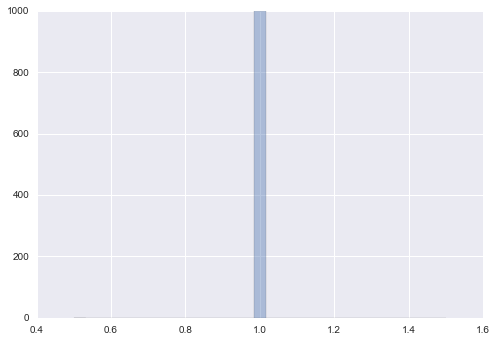

In [4]:
k = demo_select(0.1)
sbn.distplot(k, kde=False)

** Medium temperature**

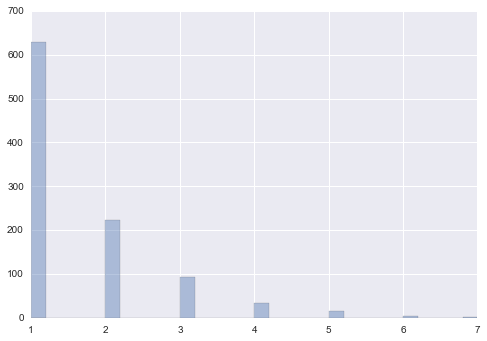

In [5]:
k = demo_select(1)
sbn.distplot(k, kde=False)

** Higher temperature**

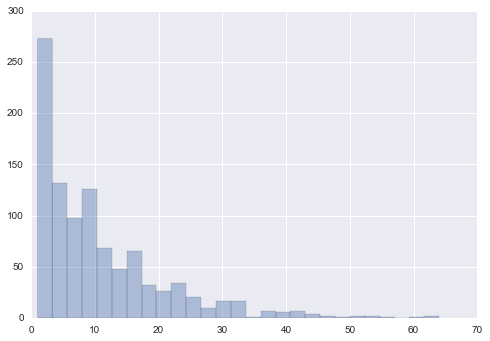

In [6]:
k = demo_select(10)
sbn.distplot(k, kde=False)

## 2. Crossover

* Many possibilities, let's start with **uniform multi point crossover**:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/OnePointCrossover.svg/231px-OnePointCrossover.svg.png">

### Implementation

In [7]:
def crossover_multi(x, y, m):
    m=m+1  # m = number of crossover points
    n=np.size(x)
    z=x*0
    k=0
    p=np.ceil(n/m).astype(int)
    for i in np.arange(1, m+1):
        ix_from = k
        ix_to = np.minimum(k+p, n)
        z[ix_from:ix_to] = x[ix_from:ix_to] if np.mod(i, 2) == 1 else y[ix_from:ix_to]
        k += p
    return z

### Demonstration

In [8]:
c = crossover_multi(np.array([1, 1, 1, 1, 1, 1], dtype=int), np.array([0, 0, 0, 0, 0, 0], dtype=int), 1)
print(c)

[1 1 1 0 0 0]


In [9]:
c = crossover_multi(np.array([1, 1, 1, 1, 1, 1], dtype=int), np.array([0, 0, 0, 0, 0, 0], dtype=int), 2)
print(c)

[1 1 0 0 1 1]


In [10]:
c = crossover_multi(np.array([1, 1, 1, 1, 1, 1], dtype=int), np.array([0, 0, 0, 0, 0, 0], dtype=int), 5)
print(c)

[1 0 1 0 1 0]


## 3. Mutation

* Let's use our **Cauchy mutation**

# Genetic Optimization (quick intro)

<img src="20160412_GO.png">